In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('final_startup_dataset_v2.csv')

In [2]:
df.head()

,name,category_list,funding_total_usd,country_code,state_code,founded_at,funding_rounds,first_funding_at,last_funding_at,status
0,1 Mainstream,"['Apps', 'Cable', 'Distribution', 'Software']",5000000,USA,CA,2012-03-01,1,2015-03-17,2015-03-17,acquired
1,1000 Markets,"['Art', 'E-Commerce', 'Marketplaces']",500000,USA,WA,2009-01-01,1,2009-05-15,2009-05-15,acquired
2,1000memories,['Curated Web'],2535000,USA,CA,2010-07-01,2,2010-01-01,2011-02-16,acquired
3,100Plus,['Analytics'],1250000,USA,CA,2011-09-16,2,2011-11-02,2011-11-30,acquired
4,1010data,['Software'],35000000,USA,NY,2000-01-01,1,2010-03-08,2010-03-08,acquired


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13959 entries, 0 to 13958
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               13958 non-null  object
 1   category_list      12873 non-null  object
 2   funding_total_usd  13959 non-null  object
 3   country_code       11968 non-null  object
 4   state_code         11750 non-null  object
 5   founded_at         10227 non-null  object
 6   funding_rounds     13959 non-null  int64 
 7   first_funding_at   13957 non-null  object
 8   last_funding_at    13959 non-null  object
 9   status             13959 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.1+ MB


In [4]:
df.isnull().sum()

name                    1
category_list        1086
funding_total_usd       0
country_code         1991
state_code           2209
founded_at           3732
funding_rounds          0
first_funding_at        2
last_funding_at         0
status                  0
dtype: int64

In [5]:
def status_to_binary(status):
    if status in ['acquired', 'ipo']:
        return 1
    elif status == 'closed':
        return 0
    else:
        return None  # if any unexpected value

# Apply to new column
df['status_binary'] = df['status'].apply(status_to_binary)

In [6]:
missing_values = pd.DataFrame({
    'Missing Count': df.isnull().sum(),
    'Missing %': (df.isnull().sum() / len(df)) * 100
}).sort_values(by='Missing Count', ascending=False)

print(missing_values)

                   Missing Count  Missing %
founded_at                  3732  26.735440
state_code                  2209  15.824916
country_code                1991  14.263199
category_list               1086   7.779927
first_funding_at               2   0.014328
name                           1   0.007164
funding_total_usd              0   0.000000
funding_rounds                 0   0.000000
last_funding_at                0   0.000000
status                         0   0.000000
status_binary                  0   0.000000


In [7]:
df['founded_at'] = pd.to_datetime(df['founded_at'], errors='coerce')
df['first_funding_at'] = pd.to_datetime(df['first_funding_at'], errors='coerce')
df['last_funding_at'] = pd.to_datetime(df['last_funding_at'], errors='coerce')


In [8]:
df.head()

,name,category_list,funding_total_usd,country_code,state_code,founded_at,funding_rounds,first_funding_at,last_funding_at,status,status_binary
0,1 Mainstream,"['Apps', 'Cable', 'Distribution', 'Software']",5000000,USA,CA,2012-03-01,1,2015-03-17,2015-03-17,acquired,1
1,1000 Markets,"['Art', 'E-Commerce', 'Marketplaces']",500000,USA,WA,2009-01-01,1,2009-05-15,2009-05-15,acquired,1
2,1000memories,['Curated Web'],2535000,USA,CA,2010-07-01,2,2010-01-01,2011-02-16,acquired,1
3,100Plus,['Analytics'],1250000,USA,CA,2011-09-16,2,2011-11-02,2011-11-30,acquired,1
4,1010data,['Software'],35000000,USA,NY,2000-01-01,1,2010-03-08,2010-03-08,acquired,1


In [9]:
df = df.drop(columns=['status'])

In [10]:
df.dropna(subset=['first_funding_at'], inplace=True)

In [11]:
missing_values = pd.DataFrame({
    'Missing Count': df.isnull().sum(),
    'Missing %': (df.isnull().sum() / len(df)) * 100
}).sort_values(by='Missing Count', ascending=False)

print(missing_values)

                   Missing Count  Missing %
founded_at                  3734  26.753600
state_code                  2209  15.827183
country_code                1991  14.265243
category_list               1086   7.781042
name                           1   0.007165
funding_total_usd              0   0.000000
funding_rounds                 0   0.000000
first_funding_at               0   0.000000
last_funding_at                0   0.000000
status_binary                  0   0.000000


In [12]:
df['state_code'] = df['state_code'].fillna('unknown')


In [13]:
# First, create a mapping of the most common country_code for each state_code
state_to_country = (
    df[df['country_code'].notna() & df['state_code'].notna()]
    .groupby('state_code')['country_code']
    .agg(lambda x: x.value_counts().index[0])
)

# Now, fill missing country_code based on that mapping
def fill_country_code(row):
    if pd.isna(row['country_code']):
        return state_to_country.get(row['state_code'], np.nan)
    return row['country_code']

df['country_code'] = df.apply(fill_country_code, axis=1)

In [14]:
missing_values = pd.DataFrame({
    'Missing Count': df.isnull().sum(),
    'Missing %': (df.isnull().sum() / len(df)) * 100
}).sort_values(by='Missing Count', ascending=False)

print(missing_values)

                   Missing Count  Missing %
founded_at                  3734  26.753600
category_list               1086   7.781042
name                           1   0.007165
funding_total_usd              0   0.000000
country_code                   0   0.000000
state_code                     0   0.000000
funding_rounds                 0   0.000000
first_funding_at               0   0.000000
last_funding_at                0   0.000000
status_binary                  0   0.000000


In [15]:
df.dropna(subset=['category_list'], inplace=True)

In [16]:
import pandas as pd

# Ensure datetime format
df['first_funding_at'] = pd.to_datetime(df['first_funding_at'], errors='coerce')
df['founded_at'] = pd.to_datetime(df['founded_at'], errors='coerce')

# Calculate mean time difference where both dates are available
valid_dates = df[df['first_funding_at'].notna() & df['founded_at'].notna()]
mean_diff = (valid_dates['first_funding_at'] - valid_dates['founded_at']).mean()

# Fill missing founded_at as first_funding_at - mean_diff
df.loc[df['founded_at'].isna(), 'founded_at'] = df['first_funding_at'] - mean_diff


In [17]:
missing_values = pd.DataFrame({
    'Missing Count': df.isnull().sum(),
    'Missing %': (df.isnull().sum() / len(df)) * 100
}).sort_values(by='Missing Count', ascending=False)

print(missing_values)

                   Missing Count  Missing %
name                           1   0.007769
category_list                  0   0.000000
funding_total_usd              0   0.000000
country_code                   0   0.000000
state_code                     0   0.000000
founded_at                     0   0.000000
funding_rounds                 0   0.000000
first_funding_at               0   0.000000
last_funding_at                0   0.000000
status_binary                  0   0.000000


In [18]:
df['name'] = df['name'].fillna('unknown')


In [19]:
df = df[df['name'].notnull()]

In [20]:
missing_values = pd.DataFrame({
    'Missing Count': df.isnull().sum(),
    'Missing %': (df.isnull().sum() / len(df)) * 100
}).sort_values(by='Missing Count', ascending=False)

print(missing_values)

                   Missing Count  Missing %
name                           0        0.0
category_list                  0        0.0
funding_total_usd              0        0.0
country_code                   0        0.0
state_code                     0        0.0
founded_at                     0        0.0
funding_rounds                 0        0.0
first_funding_at               0        0.0
last_funding_at                0        0.0
status_binary                  0        0.0


In [21]:
df.shape

(12871, 10)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12871 entries, 0 to 13958
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               12871 non-null  object        
 1   category_list      12871 non-null  object        
 2   funding_total_usd  12871 non-null  object        
 3   country_code       12871 non-null  object        
 4   state_code         12871 non-null  object        
 5   founded_at         12871 non-null  datetime64[ns]
 6   funding_rounds     12871 non-null  int64         
 7   first_funding_at   12871 non-null  datetime64[ns]
 8   last_funding_at    12871 non-null  datetime64[ns]
 9   status_binary      12871 non-null  int64         
dtypes: datetime64[ns](3), int64(2), object(5)
memory usage: 1.1+ MB


In [23]:
(df['funding_total_usd'] == '-').sum()

1512

In [24]:
# Step 1: Replace '-' with NaN
df['funding_total_usd'] = df['funding_total_usd'].replace('-', np.nan)

# Step 2: Convert to numeric
df['funding_total_usd'] = pd.to_numeric(df['funding_total_usd'], errors='coerce')

# Step 3: Fill NaN with mean funding per country
df['funding_total_usd'] = df.groupby('country_code')['funding_total_usd'] \
                            .transform(lambda x: x.fillna(x.mean()))

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12871 entries, 0 to 13958
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               12871 non-null  object        
 1   category_list      12871 non-null  object        
 2   funding_total_usd  12866 non-null  float64       
 3   country_code       12871 non-null  object        
 4   state_code         12871 non-null  object        
 5   founded_at         12871 non-null  datetime64[ns]
 6   funding_rounds     12871 non-null  int64         
 7   first_funding_at   12871 non-null  datetime64[ns]
 8   last_funding_at    12871 non-null  datetime64[ns]
 9   status_binary      12871 non-null  int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 1.1+ MB


In [26]:
# Replace '-' with NaN and convert to float
df['funding_total_usd'] = df['funding_total_usd'].replace('-', pd.NA)
df['funding_total_usd'] = pd.to_numeric(df['funding_total_usd'])


In [27]:
# Count missing values in each column
missing_counts = df.isnull().sum()
print("Missing values:\n", missing_counts)


Missing values:
 name                 0
category_list        0
funding_total_usd    5
country_code         0
state_code           0
founded_at           0
funding_rounds       0
first_funding_at     0
last_funding_at      0
status_binary        0
dtype: int64


In [28]:
# Option 1: Drop rows with too many critical missing values (like country_code)
df_cleaned = df.dropna(subset=['funding_total_usd', 'country_code', 'category_list'])

# Option 2: Fill missing founded dates with mode or placeholder
df['founded_at'] = df['founded_at'].fillna('Unknown')


                                                        Exploratory Data Analysis(EDA)

# Univariate Analysis: 

Plot 1: The chart below compares Success (Acquired/IPO) vs Fail (Closed).

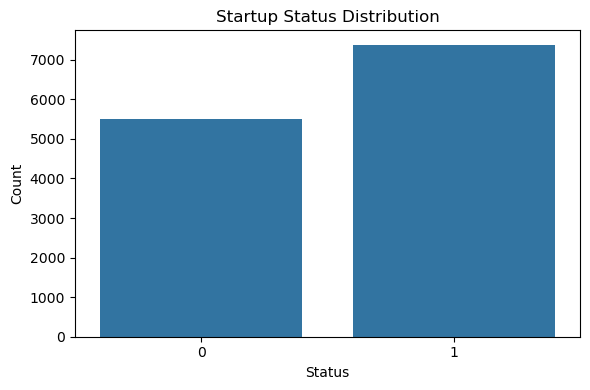

In [80]:
plt.figure(figsize=(6, 4))
sns.countplot(x='status_binary', data=df)
plt.title('Startup Status Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [ ]:
Insight:
Slightly more startups fail than succeed — confirming the high-risk nature of startups.

In [ ]:
Plot 2: Distribution of Funding Rounds

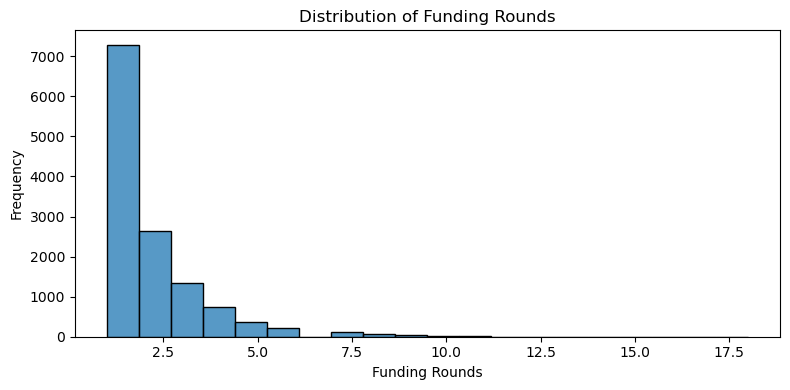

In [86]:
plt.figure(figsize=(8, 4))
sns.histplot(df['funding_rounds'], bins=20, kde=False)
plt.title('Distribution of Funding Rounds')
plt.xlabel('Funding Rounds')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


Insight:
Most startups raise 1 to 3 rounds of funding.
Very few make it beyond 5 rounds, and it drops steeply after that.

In [ ]:
Plot 3: Top 10 Countries by Startup Count

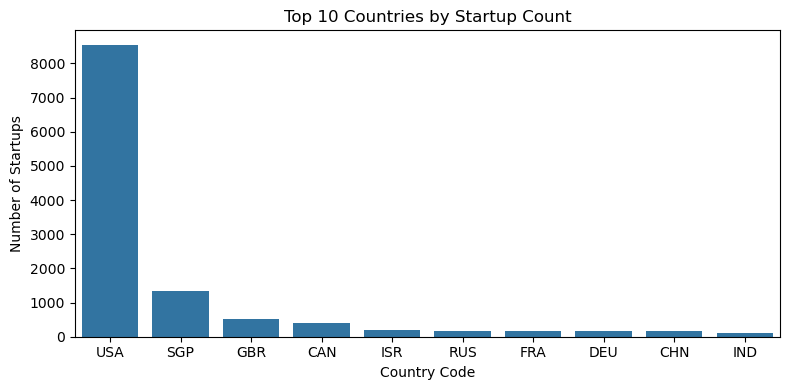

In [90]:
top_countries = df['country_code'].value_counts().head(10)
plt.figure(figsize=(8, 4))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 10 Countries by Startup Count')
plt.xlabel('Country Code')
plt.ylabel('Number of Startups')
plt.tight_layout()
plt.show()


Plot 4: Top 10 Startup Categories

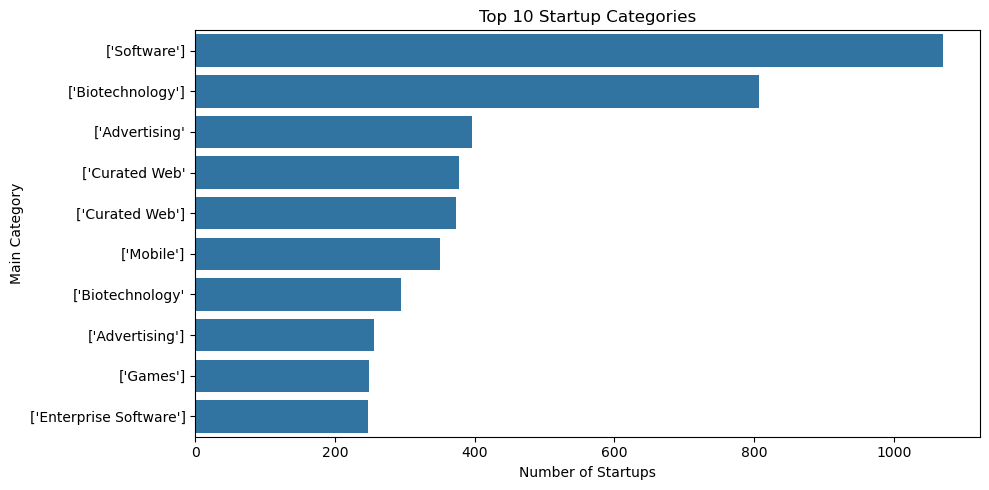

In [93]:
top_categories = df['main_category'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(y=top_categories.index, x=top_categories.values)
plt.title('Top 10 Startup Categories')
plt.xlabel('Number of Startups')
plt.ylabel('Main Category')
plt.tight_layout()
plt.show()


In [ ]:
Plot 5: Distribution of Funding Amount (Log Scale)

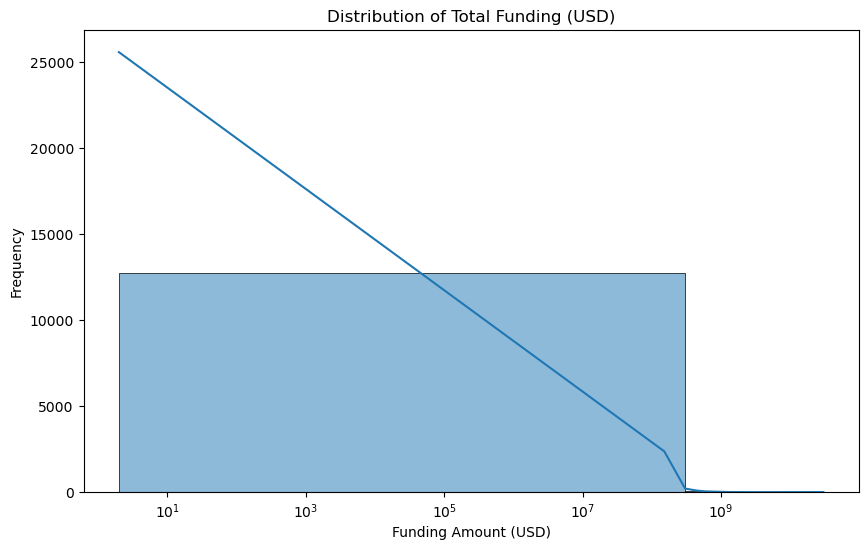

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for non-null funding values
funding_data = df['funding_total_usd'].dropna()

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(funding_data, bins=100, kde=True)
plt.title('Distribution of Total Funding (USD)')
plt.xlabel('Funding Amount (USD)')
plt.ylabel('Frequency')
plt.xscale('log')  # Use log scale for better visibility
plt.show()


In [ ]:
Insight:
The distribution is heavily right-skewed, with most startups raising less than $10M.



Plot 5: Year-wise funding

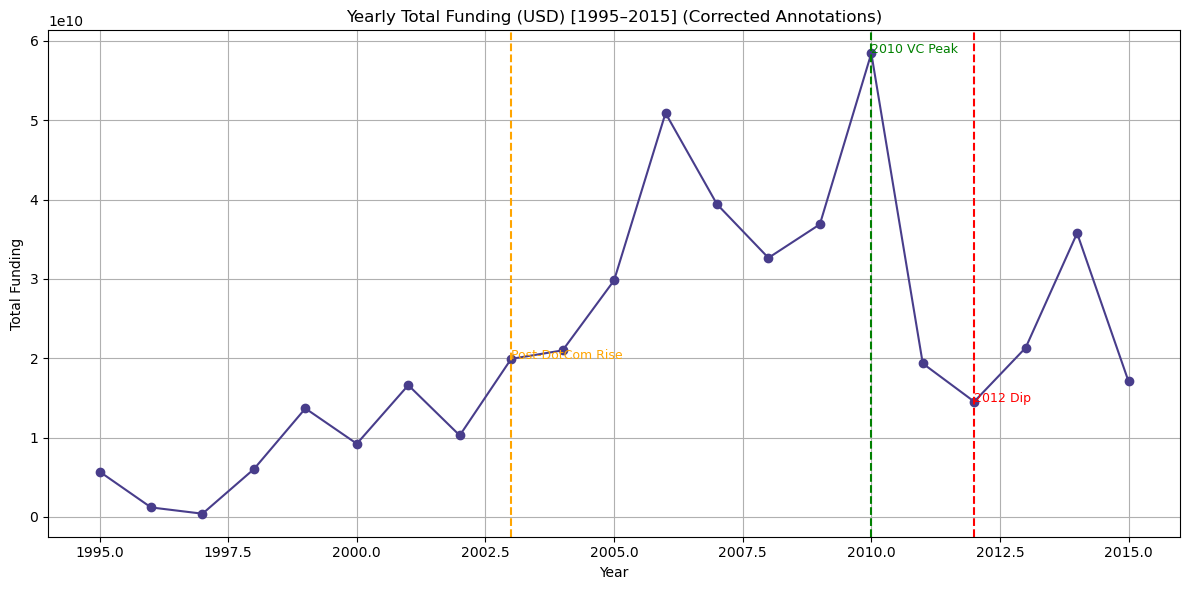

In [134]:
# Generate corrected graph with actual peak/dip markers based on the data
plt.figure(figsize=(12, 6))
ax = filtered_funding_95.plot(marker='o', color='darkslateblue')
plt.title('Yearly Total Funding (USD) [1995–2015] (Corrected Annotations)')
plt.ylabel('Total Funding')
plt.xlabel('Year')
plt.grid(True)

# 2010 – Actual VC Peak
plt.axvline(x=2010, color='green', linestyle='--')
plt.text(2010, filtered_funding_95.loc[2010], '2010 VC Peak', color='green', fontsize=9, ha='left')

# 2011–2012 – Post Peak Decline
plt.axvline(x=2012, color='red', linestyle='--')
plt.text(2012, filtered_funding_95.loc[2012], '2012 Dip', color='red', fontsize=9, ha='left')

# 2003 – Post Dot-com Recovery Lift
plt.axvline(x=2003, color='orange', linestyle='--')
plt.text(2003, filtered_funding_95.loc[2003], 'Post-DotCom Rise', color='orange', fontsize=9, ha='left')

plt.tight_layout()
plt.show()


In [ ]:
                                                            # Bi-variate Analysis: 

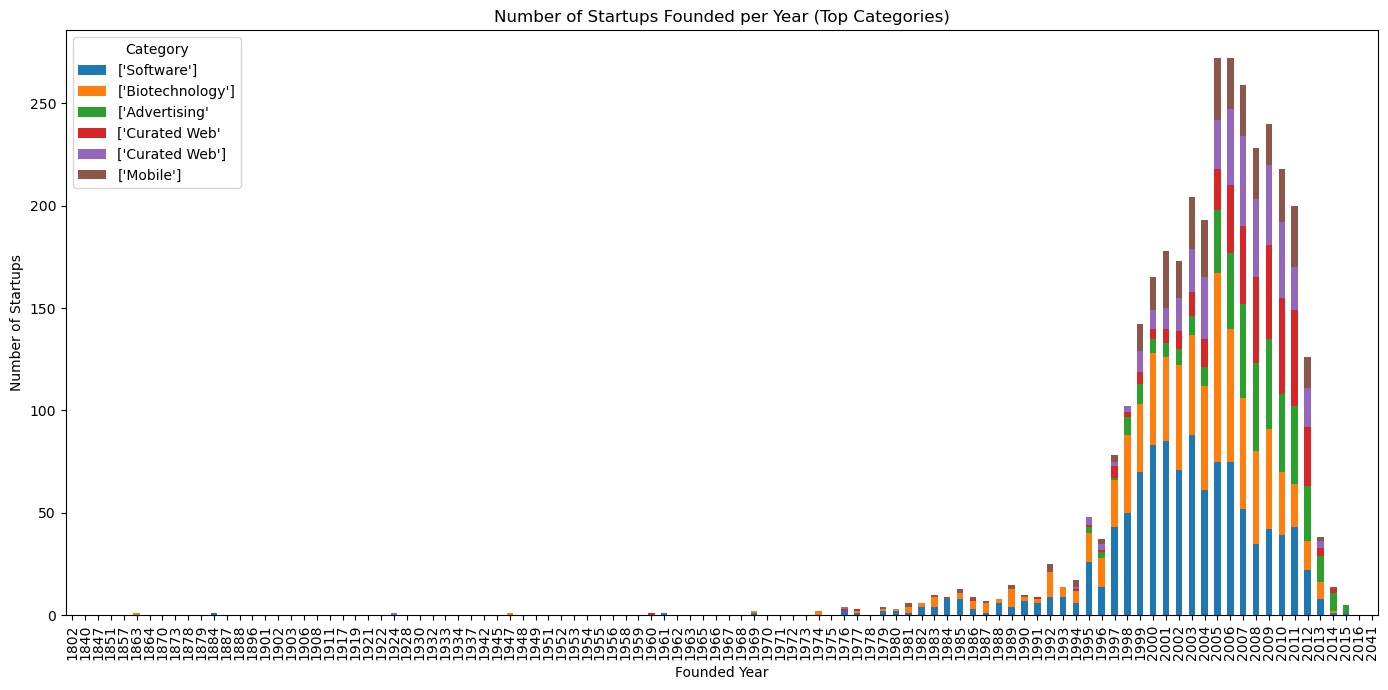

In [32]:
# Extract year from founded_at
df['founded_year'] = df['founded_at'].dt.year

# Extract main category if not already done
df['main_category'] = df['category_list'].str.split(',').str[0]

# Drop rows with missing year or category
founded_by_year_category = df.dropna(subset=['founded_year', 'main_category'])

# Group by year and main category
grouped = founded_by_year_category.groupby(['founded_year', 'main_category']).size().reset_index(name='count')

# Pivot for heatmap-style view
pivot_df = grouped.pivot(index='founded_year', columns='main_category', values='count').fillna(0)

# Plot: stacked bar chart for top categories
top_categories = df['main_category'].value_counts().head(6).index.tolist()
pivot_top = pivot_df[top_categories]

pivot_top.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Number of Startups Founded per Year (Top Categories)')
plt.xlabel('Founded Year')
plt.ylabel('Number of Startups')
plt.legend(title='Category')
plt.tight_layout()
plt.show()



Insight:
Some categories (like Software or Mobile) consistently dominate across years.
 

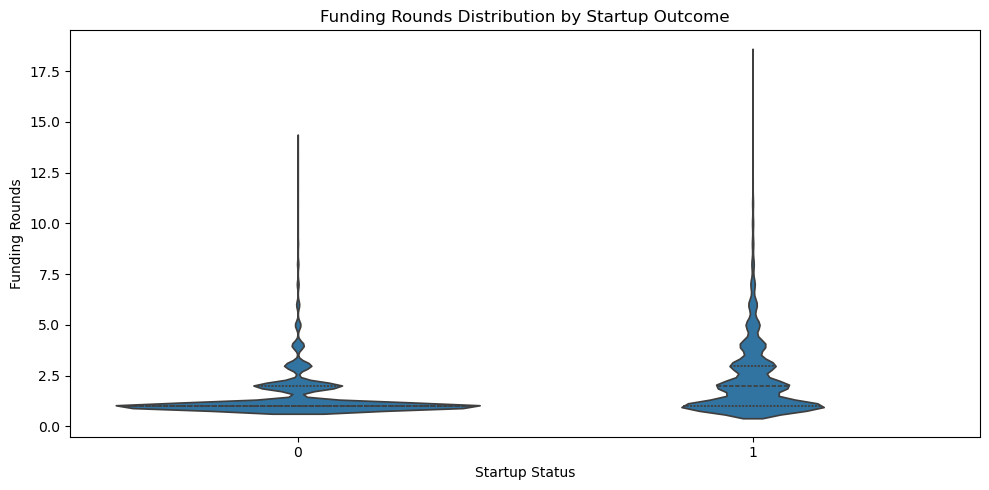

In [99]:
plt.figure(figsize=(10, 5))
sns.violinplot(data=df, x='status_binary', y='funding_rounds', inner='quartile')
plt.title('Funding Rounds Distribution by Startup Outcome')
plt.xlabel('Startup Status')
plt.ylabel('Funding Rounds')
plt.tight_layout()
plt.show()


Table:Success Rate by Category (with minimum threshold of atleast 10 companies)

In [37]:
# Count number of startups per category
category_counts = df['main_category'].value_counts()

# Set a threshold (e.g., only include categories with at least 10 startups)
threshold = 10
valid_categories = category_counts[category_counts >= threshold].index

# Filter the DataFrame
filtered_df = df[df['main_category'].isin(valid_categories)]

# Group and calculate success rate
success_by_category = (
    filtered_df.groupby('main_category')['status_binary']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
)

success_by_category['Success Rate (%)'] = (success_by_category[1] * 100).round(2)
top_success_cat = success_by_category.sort_values(by='Success Rate (%)', ascending=False).head(10)

# Display
top_success_cat


status_binary,0,1,Success Rate (%)
main_category,,,
['Hardware',0.062500,0.937500,93.75
['Biotechnology',0.101695,0.898305,89.83
['Communications Hardware',0.136364,0.863636,86.36
['Security',0.181818,0.818182,81.82
['Photography',0.181818,0.818182,81.82
['Content Delivery',0.200000,0.800000,80.00
['Human Resources',0.200000,0.800000,80.00
['Data Security',0.200000,0.800000,80.00
['Pharmaceuticals'],0.200000,0.800000,80.00


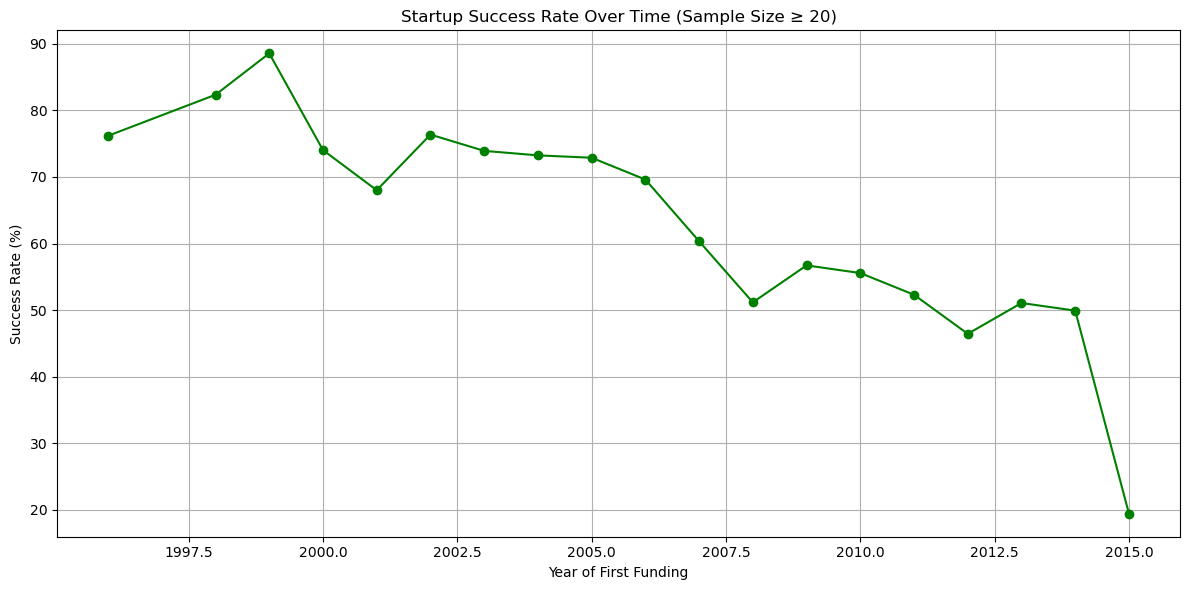

In [128]:

yearly_success = df.groupby(['funding_year', 'status_label']).size().unstack().fillna(0)
yearly_success['Total'] = yearly_success.sum(axis=1)
yearly_success['Success Rate (%)'] = (yearly_success['Success'] / yearly_success['Total']) * 100

# Filter for years with sufficient data points
min_sample_size = 20
valid_years = yearly_success[yearly_success['Total'] >= min_sample_size].index
filtered_success = yearly_success.loc[valid_years]

# Plot the filtered success rate
plt.figure(figsize=(12, 6))
plt.plot(filtered_success.index, filtered_success['Success Rate (%)'], marker='o', color='green')
plt.title('Startup Success Rate Over Time (Sample Size ≥ 20)')
plt.xlabel('Year of First Funding')
plt.ylabel('Success Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()



1998–2000: High success rate due to selective funding and fewer startups.

2001–2003: Sharp decline post dot-com crash.

2004–2007: Stabilized success rates (~30–40%) as markets recovered.

2008–2010: Drop during global financial crisis.

2011–2014: Mild recovery with rise of VC boom and mobile-first startups.


In [ ]:
Plot 4: Funding Distribution by Startup Outcome(Log scale due to wide funding range)

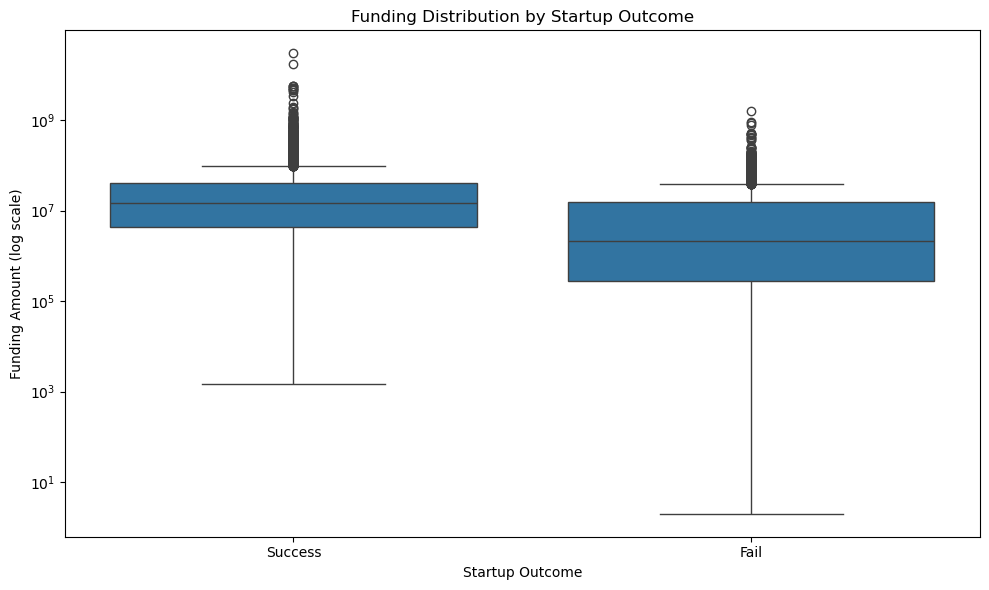

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Map numeric 0/1 to readable labels if needed
if df['status_binary'].dtype == 'int64':
    df['status_label'] = df['status_binary'].map({0: 'Fail', 1: 'Success'})
else:
    df['status_label'] = df['status_binary']

# Drop missing funding values
funding_df = df[['funding_total_usd', 'status_label']].dropna()

# Plot boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='status_label', y='funding_total_usd', data=funding_df)
plt.yscale('log') 
plt.title('Funding Distribution by Startup Outcome')
plt.xlabel('Startup Outcome')
plt.ylabel('Funding Amount (log scale)')
plt.tight_layout()
plt.show()


This will answer:

Do successful startups raise more money on average?-Yes
Is there a clear separation in funding patterns between failed and successful startups?-Yes,success distribution is wider and shifted upward. Failure group is tight and low.

